# Louise File



In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import csv

In [66]:
# Open price data with pandas 
filename1 = 'SP_500_close_2015.csv'
priceData = pd.read_csv(filename1,index_col = 0)

In [67]:
# Open film data with pandas 
filename2 = 'SP_500_firms.csv'
firmData = pd.read_csv(filename2,index_col = 0)

In [68]:
#Check price data
print(type(priceData))
print(priceData.columns)

<class 'pandas.core.frame.DataFrame'>
Index(['MMM', 'ABT', 'ABBV', 'ACN', 'ATVI', 'AYI', 'ADBE', 'AAP', 'AES', 'AET',
       ...
       'XEL', 'XRX', 'XLNX', 'XL', 'XYL', 'YHOO', 'YUM', 'ZBH', 'ZION', 'ZTS'],
      dtype='object', length=496)


In [69]:
#Check firms data
print(type(firmData))
print(firmData.columns)

<class 'pandas.core.frame.DataFrame'>
Index(['Name', 'Sector'], dtype='object')


## Analysis of Daily performance

In [73]:
priceMatrix = priceData.as_matrix()

In [74]:
## Calculate the daily price changes using numpy
PriceChangeMatrix = (priceMatrix[1: ] - priceMatrix[ :-1]) / priceMatrix[ :-1]

In [75]:
##convert to a data frame with the correct index and column names
PriceChangeDF = pd.DataFrame(PriceChangeMatrix, index=priceData.index[1:], columns = priceData.columns)

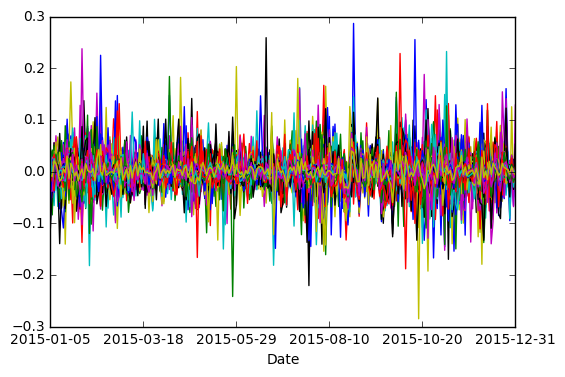

In [76]:
##Plot the changes over time
dailyPriceChangeDataFig = PriceChangeDF.plot(legend=False,figsize=(6,4))
dailyPriceChangeDataFig

In [77]:
PriceChangeDF['Date'] = PriceChangeDF.index
##melt data frame so each row is one price change observation
PriceChangeDFmelted = pd.melt(PriceChangeDF, id_vars = "Date")
PriceChangeDFmelted = PriceChangeDFmelted.rename(columns = {
    'variable':'Symbol',
    'value':'Price Change'
})
##sort melted dataframe in descending order of price change
PriceChangeDFsorted = PriceChangeDFmelted.sort_values(by='Price Change', ascending=False)
##merge on firm data with the symbol as the key
PriceChangeDFsortedfull = PriceChangeDFsorted.merge(firmData, left_on='Symbol', right_index=True, how='left')

**Top 10 daily stock movements**

In [78]:
PriceChangeDFsortedfull[:10]

,Date,Symbol,Price Change,Name,Sector
49359,2015-08-27,FCX,0.286616,Freeport-McMoran Cp & Gld,Materials
121098,2015-06-22,WMB,0.258999,Williams Cos.,Energy
110887,2015-10-14,TRIP,0.255361,TripAdvisor,Consumer Discretionary
53731,2015-01-29,HAR,0.237600,Harman Int'l Industries,Consumer Discretionary
92330,2015-11-06,QRVO,0.232254,Qorvo,Information Technology
121923,2015-10-02,WYNN,0.228389,Wynn Resorts Ltd,Consumer Discretionary
110718,2015-02-12,TRIP,0.224915,TripAdvisor,Consumer Discretionary
57579,2015-05-29,HUM,0.203128,Humana Inc.,Health Care
64457,2015-10-21,KLAC,0.187895,KLA-Tencor Corp.,Information Technology
86408,2015-04-08,PRGO,0.183899,Perrigo,Health Care


Potential evidence found for:

Trip advisor: http://fortune.com/2015/10/14/tripadvisor-stock-gain-priceline-deal/

Williams: http://www.forbes.com/sites/antoinegara/2015/06/22/pipeline-giant-williams-rejects-64-a-share-takeover-bid-from-energy-transfer/#318056c339f8

Harman: http://investor.harman.com/releasedetail.cfm?releaseid=890984 &&  http://investor.harman.com/releasedetail.cfm?releaseid=893546 

Qorvo: http://www.qorvo.com/news/2015/qorvo-announces-proposed-1-billion-senior-notes-offering && http://www.bizjournals.com/triad/news/2015/11/06/qorvo-revenue-rises-in-latest-quarter.html

**10 most negative daily stock movements**

In [79]:
PriceChangeDFsortedfull[-10:]

,Date,Symbol,Price Change,Name,Sector
3720,2015-10-28,AKAM,-0.167306,Akamai Technologies Inc,Information Technology
70243,2015-11-09,MNK,-0.169981,Mallinckrodt Plc,Health Care
82309,2015-12-04,NRG,-0.179581,NRG Energy,Utilities
74667,2015-06-26,MU,-0.181515,Micron Technology,Information Technology
88624,2015-02-04,RL,-0.182169,Polo Ralph Lauren Corp.,Consumer Discretionary
123683,2015-10-07,YUM,-0.188324,Yum! Brands Inc,Consumer Discretionary
103364,2015-10-23,SRCL,-0.192767,Stericycle Inc,Industrials
17458,2015-07-24,BIIB,-0.220802,BIOGEN IDEC Inc.,Health Care
74143,2015-05-27,KORS,-0.241954,Michael Kors Holdings,Consumer Discretionary
92817,2015-10-16,PWR,-0.285006,Quanta Services Inc.,Industrials


Potential evidence for:

Akami http://www.fool.com/investing/general/2015/10/28/why-akamai-technologies-inc-fell-hard-on-wednesday.aspx

Millinckrodt http://www.bloomberg.com/news/articles/2015-11-09/mallinckrodt-slumps-on-scrutiny-from-valeant-foe-citron-research

NRG Energy http://247wallst.com/infrastructure/2015/12/04/nrg-continues-to-fall-as-ceo-steps-down/

Micron http://marketrealist.com/2015/06/microns-share-price-fall-19-june-26/

Yum http://www.reuters.com/article/us-yum-brands-china-idUSKCN0S11SZ20151007

Michael Kors http://money.cnn.com/2015/05/27/investing/michael-kors-earnings-stock-drop/


## Analysis of Yearly performance

In [80]:
##Calculate the yearly returns (final price - start price)/start price
TotalPriceChangeMatrix = (priceMatrix[-1: ] - priceMatrix[ :1]) / priceMatrix[ :1]
##convert to a data frame with the correct index and column names
TotalPriceChangeDF = pd.DataFrame(TotalPriceChangeMatrix, columns = priceData.columns)
##transpose data frame
TotalPriceChangeDFtransposed = TotalPriceChangeDF.transpose()
TotalPriceChangeDFtransposed.columns = ['Price Change']
##sort melted dataframe in descending order of price change
TotalPriceChangeDFsorted = TotalPriceChangeDFtransposed.sort_values(by='Price Change', ascending=False)
##merge on firm data with the symbol as the key (index in both dfs)
TotalPriceChangeDFsortedfull = TotalPriceChangeDFsorted.merge(firmData, left_index=True, right_index=True, how='left')

**Top performing companies over the full year**

In [81]:
TotalPriceChangeDFsortedfull[:10]

,Price Change,Name,Sector
NFLX,1.294549,Netflix Inc.,Information Technology
AMZN,1.190750,Amazon.com Inc,Consumer Discretionary
ATVI,0.942684,Activision Blizzard,Information Technology
AYI,0.676443,Acuity Brands Inc,Industrials
NVDA,0.664514,Nvidia Corporation,Information Technology
GPN,0.600933,Global Payments Inc,Information Technology
HRL,0.559016,Hormel Foods Corp.,Consumer Staples
EXR,0.544469,Extra Space Storage,Financials
VRSN,0.527540,Verisign Inc.,Information Technology
RAI,0.497837,Reynolds American Inc.,Consumer Staples


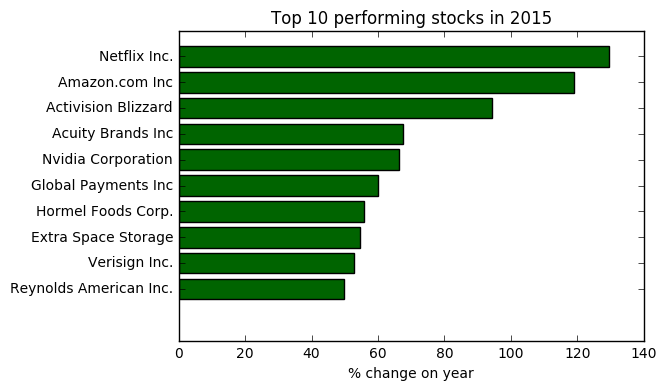

In [82]:
y_pos_top_10 = np.arange(len(TotalPriceChangeDFsortedfull['Name'][:10])-1,-1,-1)
plt.barh(y_pos_top_10, TotalPriceChangeDFsortedfull['Price Change'][:10]*100,
         align='center', color='darkgreen')
plt.yticks(y_pos_top_10, TotalPriceChangeDFsortedfull['Name'][:10])
plt.xlabel("% change on year")
plt.title("Top 10 performing stocks in 2015")

**Worse performing companies over the full year**

In [83]:
TotalPriceChangeDFsortedfull[-10:]

,Price Change,Name,Sector
WYNN,-0.516602,Wynn Resorts Ltd,Consumer Discretionary
MUR,-0.538541,Murphy Oil,Energy
MRO,-0.546383,Marathon Oil Corp.,Energy
RRC,-0.553864,Range Resources Corp.,Energy
NRG,-0.559234,NRG Energy,Utilities
MU,-0.592518,Micron Technology,Information Technology
KMI,-0.632032,Kinder Morgan,Energy
FCX,-0.703792,Freeport-McMoran Cp & Gld,Materials
SWN,-0.738314,Southwestern Energy,Energy
CHK,-0.769785,Chesapeake Energy,Energy


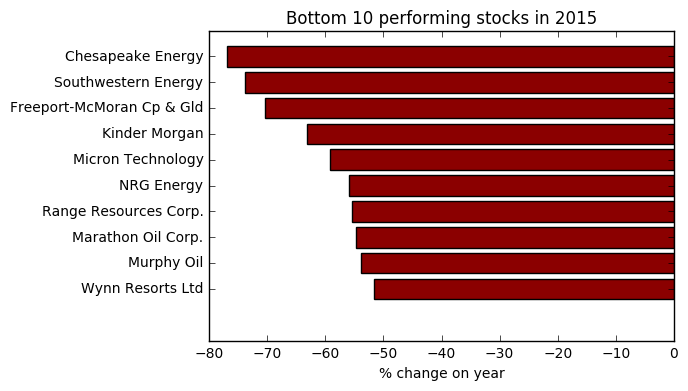

In [84]:
y_pos_top_10 = np.arange(len(TotalPriceChangeDFsortedfull['Name'][-10:]))
plt.barh(y_pos_top_10, TotalPriceChangeDFsortedfull['Price Change'][-10:]*100,
         align='center', color='darkred')
plt.yticks(y_pos_top_10, TotalPriceChangeDFsortedfull['Name'][-10:])
plt.xlabel("% change on year")
plt.title("Bottom 10 performing stocks in 2015")

**Total yearly changes for all companies - descending**

<Container object of 496 artists>

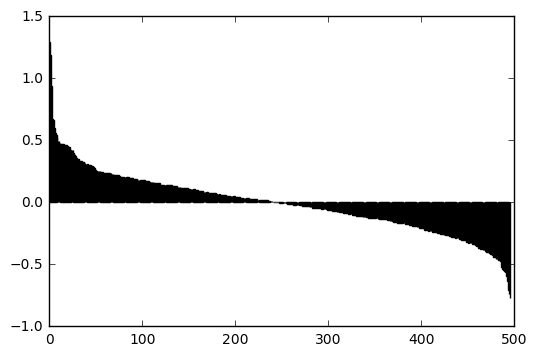

In [85]:
y_pos_all_companies = np.arange(len(TotalPriceChangeDFsortedfull['Name']))
plt.bar(y_pos_all_companies,TotalPriceChangeDFsortedfull['Price Change'])

In [86]:
np.std(PriceChangeDF['MMM'])

0.011635739586320415

In [87]:
##calculate sds and change into panda dataframe
sdPriceChangeDF = pd.DataFrame(np.std(PriceChangeDF, axis=0), columns=['Standard Deviation'])
##sort on standard deviation
sdPriceChangeDFsorted = sdPriceChangeDF.sort_values(by='Standard Deviation', ascending=False)
##merge on firm data with the symbol as the key (index in both dfs)
sdPriceChangeDFsortedfull = sdPriceChangeDFsorted.merge(firmData, left_index=True, right_index=True, how='left')

**Stocks with most variable price changes**

In [88]:
sdPriceChangeDFsortedfull[0:10]

,Standard Deviation,Name,Sector
FCX,0.043983,Freeport-McMoran Cp & Gld,Materials
CHK,0.042699,Chesapeake Energy,Energy
RIG,0.037479,Transocean,Energy
SWN,0.035129,Southwestern Energy,Energy
WYNN,0.034848,Wynn Resorts Ltd,Consumer Discretionary
QRVO,0.033406,Qorvo,Information Technology
MNK,0.032508,Mallinckrodt Plc,Health Care
WMB,0.032159,Williams Cos.,Energy
RRC,0.032108,Range Resources Corp.,Energy
NFLX,0.031911,Netflix Inc.,Information Technology


In [89]:
plt.style.available

['classic',
 'seaborn-poster',
 'fivethirtyeight',
 'seaborn-notebook',
 'seaborn-talk',
 'seaborn-darkgrid',
 'grayscale',
 'ggplot',
 'bmh',
 'seaborn-deep',
 'seaborn-bright',
 'seaborn-dark-palette',
 'seaborn-paper',
 'seaborn-muted',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-pastel',
 'seaborn-colorblind',
 'dark_background',
 'seaborn-whitegrid',
 'seaborn-dark']

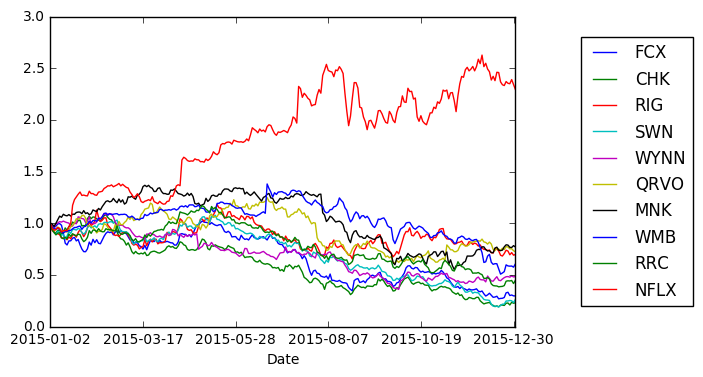

In [90]:
## create list of company ticker names that are in the top 10 most variable
columnlist = sdPriceChangeDFsortedfull[0:10].index.values.tolist()
##create data frame of price data for just the top 10 most variable companies
variablePriceData = priceData[columnlist]
##scale based on first price
variablePricesScaled = variablePriceData.divide(priceData[columnlist].ix[0]) 
variablePricesScaled.plot()
plt.legend(loc='right', bbox_to_anchor=(1.4,.5))

TODO: fix colours.

([<matplotlib.axis.XTick at 0x12082c588>,
 <a list of 4 Text xticklabel objects>)

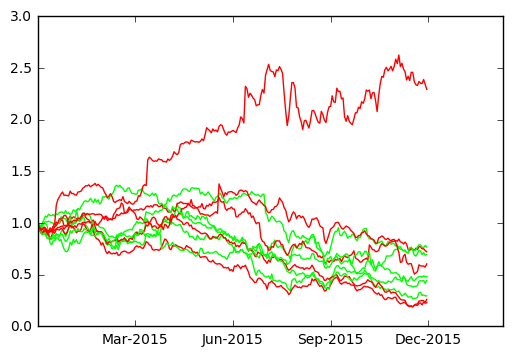

In [91]:
## create list of company ticker names that are in the top 10 most variable
columnlist = sdPriceChangeDFsortedfull[0:10].index.values.tolist()
##create data frame of price data for just the top 10 most variable companies
variablePriceData = priceData[columnlist]
##scale based on first price
variablePricesScaled = variablePriceData.divide(priceData[columnlist].ix[0])
y_pos_dates = np.arange(len(variablePricesScaled.index))

colors = ['#00ff00','#ff0000','#00ff00','#ff0000','#00ff00','#ff0000','#00ff00','#ff0000','#00ff00','#ff0000']
for i in range(0,len(columnlist)):
    plt.plot(y_pos_dates,variablePricesScaled[columnlist[i]], c=colors[i], label="test")

plt.xticks([len(variablePricesScaled.index)/4,
            len(variablePricesScaled.index)*2/4,
            len(variablePricesScaled.index)*3/4,
            len(variablePricesScaled.index)],
           ["Mar-2015","Jun-2015","Sep-2015","Dec-2015"])

**Stocks with least variable price changes**

In [92]:
sdPriceChangeDFsortedfull[-10:]

,Standard Deviation,Name,Sector
PG,0.010086,Procter & Gamble,Consumer Staples
RSG,0.009953,Republic Services Inc,Industrials
VZ,0.009929,Verizon Communications,Telecommunications Services
T,0.009923,AT&T Inc,Telecommunications Services
DVA,0.009863,DaVita Inc.,Health Care
CLX,0.009706,The Clorox Company,Consumer Staples
PEP,0.009693,PepsiCo Inc.,Consumer Staples
AJG,0.009691,Arthur J. Gallagher & Co.,Financials
CHD,0.009579,Church & Dwight,Consumer Staples
KO,0.009045,The Coca Cola Company,Consumer Staples


# Appendix / not to be used








In [ ]:
##add date column in explicitly
PriceChangeDF.ix['Date'] = 0

In [ ]:
PriceChangeDF

In [ ]:
# Double check for correctness
    
priceData.tail()
dailyPriceChangeData.tail()

In [ ]:
# Analyse the returns

# Plot the changes over time
dailyPriceChangeDataFig = dailyPriceChangeData.plot(legend=False,figsize=(6,4))

# Save figure into working directory
plt.savefig('dailymovements2015.png', bbox_inches='tight')

#%%
##Figure out the top changes over time 



#%% Do correlation matrix - input of a matrix with columns, output of a matrix with pairwise comparisons


#%% Convert matrix of correlations to graph


#%% Graph clustering algorithm

#%% Not used yet - notes and heikke's code

##### Read company names into a dictionary
def readNamesIntoDict():
    d = dict()
    input_file = csv.DictReader(open("SP_500_firms.csv"))
    for row in input_file:
        #print(row)
        d[row['Symbol']] = [row['Name'],row['Sector']]
    return d

namesDict = readNamesIntoDict()

compNames = namesDict.keys()


##### Prices into standarad Python data structures

# Read prices into dictionary of lists

def readPricesIntoDict():
    input_file = csv.DictReader(open('SP_500_close_2015.csv', 'r')) 
    d = dict()
    for row in input_file:
        for column, value in row.items():
            d.setdefault(column, []).append(value)
    return d


prices = readPricesIntoDict()


## try to find the companies that are in Names but not in File

##identify companies that we don't have data for
list(set(compNames) - set(prices))
##double check that there are no companies in prices that aren't in compNames
list(set(prices) - set(compNames))

##### Prices into pandas

###       
for company in enumerate(priceData.columns):
    
    
        for row in range(0,priceData.shape[0]):
            priceData.ix[row, "newcolumn"] = (priceData.ix[row, "ZTS"] - priceData.ix[row-1, "ZTS"])/priceData.ix[row-1, "ZTS"]
                 
for row in range(0,priceData.shape[0]):
    priceData.ix[row, "newcolumn"] = (priceData.ix[row, company] - priceData.ix[row-1, company])/priceData.ix[row-1, company]                  
                  
                  
            
for row in range(0,priceData.shape[0]):
    print(row)

# Get specific data from dataframe

firstPrices =priceData.ix[0] # This is a "series" of first-day prices
print(type(firstPrices))

firstColumnPrices = priceData.ix[:,0] # First company by index 


applePrices = priceData['AAPL'] # Get by column name
msftPrices = priceData['MSFT']

# Create dataframe from series, then add another series
customPrices = applePrices.to_frame('AAPL')
customPrices = customPrices.join(msftPrices.to_frame('MSFT'))

print(customPrices)  

# Normalise data by first price
pricesScaled = priceData.divide(priceData.ix[0]) 
# Plot
priceFig = pricesScaled.plot(legend=False,figsize=(6,4))

# Save figure into working directory
plt.savefig('stocks2015.png', bbox_inches='tight')


# Loop through companies
for index,company in enumerate(priceData.columns):
        print(company,index)


# Turn into numpy matrix
priceMatrix = priceData.as_matrix()
# Into a 1D array
priceArray = priceMatrix.flatten() 

# Numpy is useful for eg math
np.sqrt(200)




In [ ]:
##initialise data frame, with the index the same as the priceData index
##note: this index is the dates
dailyPriceChangeData = pd.DataFrame(index=priceData.index)

In [ ]:
dailyPriceChangeData.head()

In [ ]:
##function to update cell of dailyPriceChangeData, based on the company and the row.
##def dailymovement(company,row):
########for initial days, set to numpy NAN
####if row ==0: 
######dailyPriceChangeData.ix[row, company] = np.NAN  
#####else, set to price that day - price on previous day / price on previous day.         
#####else:
#######dailyPriceChangeData.ix[row, company] = (priceData.ix[row, company] - priceData.ix[row-1, company])/priceData.ix[row-1, company]        

In [ ]:
##Don't run this, it takes way too long.
##loop through all companies, and rows, to populate new dataframe
##this takes quite a lot of time
##at the moment it prints out the iteratiom
##so that you can see progress. 
##for company in priceData.columns:
######for row in range(0,priceData.shape[0]):
##########dailymovement(company,row)
##########print(str(company) + str(row))

In [ ]:
##Find the top change
PriceChangeDF.values.max()

In [ ]:
##Find the top change
PriceChangeDF.values.min()